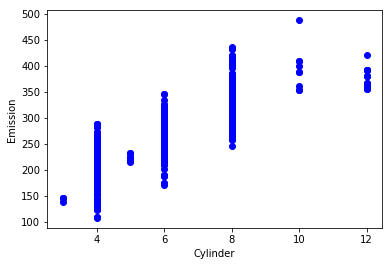

In [6]:
#plot CYLINDER vs the Emission, to see how linear is their relation:

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv("FuelConsumption.csv")

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [11]:
'''Try to use a multiple linear regression with the same dataset but this time use __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?'''

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv("FuelConsumption.csv")

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

#For prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

#It doesn't result into better accuracy because the variance score is less than 1.

Coefficients:  [[ 11.29629049   6.55223177   6.1560568    3.70259519]]
Residual sum of squares: 657.83
Variance score: 0.84
